In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [21]:
folder = "D:\Tinu Project\Projects Files Excel"
file = "Cars_Data.xlsx"

data = os.path.join(folder,file)
df = pd.read_excel(data)

print(df.head())

    Make           Model   Type Origin DriveTrain     MSRP  Invoice  \
0  Acura             MDX    SUV   Asia        All  36945.0  33337.0   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  23820.0  21761.0   
2  Acura         TSX 4dr  Sedan   Asia      Front  26990.0  24647.0   
3  Acura          TL 4dr  Sedan   Asia      Front  33195.0  30299.0   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  43755.0  39014.0   

   EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
0         3.5        6.0       265.0      17.0         23.0  4451.0   
1         2.0        4.0       200.0      24.0         31.0  2778.0   
2         2.4        4.0       200.0      22.0         29.0  3230.0   
3         3.2        6.0       270.0      20.0         28.0  3575.0   
4         3.5        6.0       225.0      18.0         24.0  3880.0   

   Wheelbase  Length  
0      106.0   189.0  
1      101.0   172.0  
2      105.0   183.0  
3      108.0   186.0  
4      115.0   197.0  


In [22]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    float64
 6   Invoice      428 non-null    float64
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    float64
 10  MPG_City     428 non-null    float64
 11  MPG_Highway  428 non-null    float64
 12  Weight       428 non-null    float64
 13  Wheelbase    428 non-null    float64
 14  Length       428 non-null    float64
dtypes: float64(10), object(5)
memory usage: 50.8+ KB
None
                MSRP        Invoice  EngineSize   Cylinders  Horsepower  \
count     428.000000     428.000000  428.000000

In [23]:
print(df.isnull().sum())
df.dropna(inplace=True)

Make           4
Model          4
Type           4
Origin         4
DriveTrain     4
MSRP           4
Invoice        4
EngineSize     4
Cylinders      6
Horsepower     4
MPG_City       4
MPG_Highway    4
Weight         4
Wheelbase      4
Length         4
dtype: int64


In [24]:
print(df.isnull().sum())

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64


In [25]:
df.drop(['Make', 'Model'], axis=1, inplace=True)

In [27]:
categorical_cols = ['Type', 'Origin', 'DriveTrain']
numeric_cols = [col for col in df.columns if col not in categorical_cols]

In [28]:
df_categorical = pd.get_dummies(df[categorical_cols])


In [29]:
imputer = SimpleImputer(strategy='mean')
df_numeric_imputed = imputer.fit_transform(df[numeric_cols])


In [30]:
scaler = StandardScaler()
df_numeric_scaled = scaler.fit_transform(df_numeric_imputed)


In [31]:
df_scaled = np.concatenate((df_categorical, df_numeric_scaled), axis=1)

In [32]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

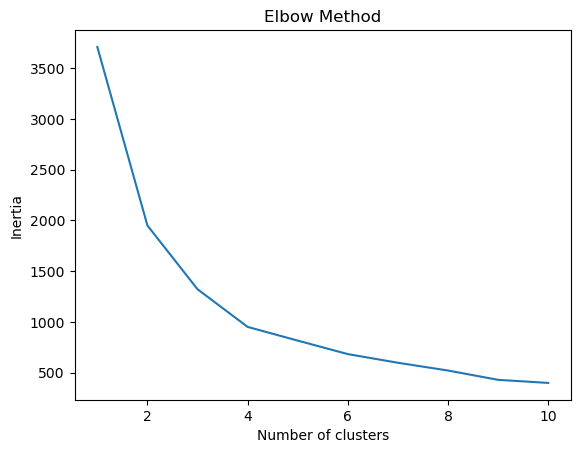

In [33]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [34]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_pca)

C:\Users\mohit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

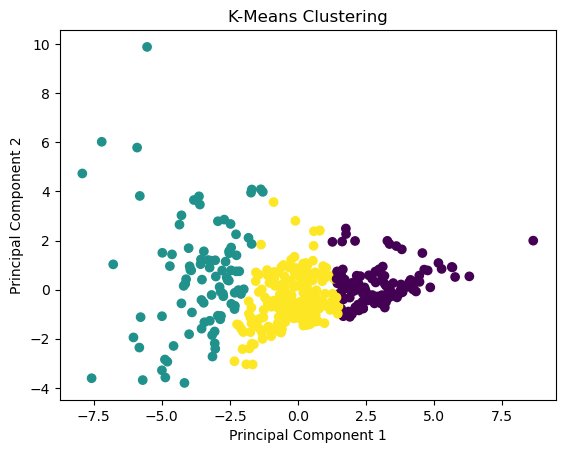

In [35]:
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.show()